# `Latar Belakang`
Memahami segmentasi pasar sangat penting bagi setiap bisnis untuk secara efektif menargetkan audiens mereka dan mengoptimalkan produk mereka. Pengetahuan yang komprehensif tentang produk memainkan peran penting dalam memastikan kelancaran proses bisnis. Berbagai metode dapat digunakan untuk menganalisis segmentasi pasar, termasuk mempelajari perilaku pelanggan dan mengidentifikasi kebutuhan mereka. Dengan menganalisis data dari dataset `Supermarket Customers`, kami bertujuan untuk mengembangkan strategi pemasaran yang efektif untuk meningkatkan penjualan produk dan membantu mencapai target penjualan.

## `Pernyataan Masalah`

Perusahaan ingin mengeksplorasi segmentasi pasar untuk produk mereka. Hal ini mencakup beberapa langkah kunci, antara lain:

#### 1. Menganalisis Kinerja Produk dan Layanan 
* Mengidentifikasi produk mana yang memiliki tingkat penjualan tertinggi dan terendah.

#### 2. Memeriksa Segmentasi Pelanggan Berdasarkan Pembelian Produk

* Menentukan kategori Usia, Status Pernikahan, Pendidikan, Pendapatan, Kidhome, dan Teenhome yang memiliki korelasi signifikan dengan pengeluaran untuk produk.
* Memahami kebutuhan dan preferensi pelanggan di berbagai kategori tersebut (Usia, Status Pernikahan, Pendidikan, Pendapatan).
* Mengumpulkan detail demografis yang relevan tentang calon pelanggan, termasuk usia, pendapatan, pendidikan, status pernikahan, dan keberadaan anak-anak.
#### 3. Menilai Efektivitas Kampanye Supermarket terhadap Penjualan
* Mengevaluasi bagaimana jumlah kampanye yang diterima pelanggan memengaruhi tingkat penjualan produk.
* Menganalisis efektivitas setiap batch kampanye terhadap pendapatan di berbagai kategori produk.
#### 4. Menentukan Lokasi Optimal untuk Penjualan Produk
* Mengidentifikasi lokasi penjualan terbaik dengan jumlah pembelian produk tertinggi.
* Memahami segmen pelanggan mana yang dominan berbelanja di lokasi tertentu.
* Menganalisis kategori produk yang paling sering dibeli di lokasi yang berbeda.
#### 5. Menarik Kesimpulan Analitik

Sebagai analis data, kami akan berupaya menjawab poin-poin ini dan memberikan wawasan yang dapat ditindaklanjuti.

# `Data`
Untuk menjawab pertanyaan di atas, kami akan menganalisis data pelanggan supermarket yang telah dikumpulkan sebelumnya. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=drive_link). 

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings("ignore")


Dataset ini berisi deskripsi tentang detail data pelanggan supermarket ideal suatu perusahaan. Dataset ini memiliki 29 kolom yang menjelaskan kebiasaan dan demografi pelanggan. Setiap dari 29 kolom tersebut dibagi ke dalam 4 kategori, berikut adalah detailnya:

#### A. People
* ID: Identitas unik pelanggan
* Year_Birth: Tahun kelahiran pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status pernikahan pelanggan
* Income: Pendapatan tahunan rumah tangga pelanggan
* Kidhome: Jumlah anak kecil di rumah tangga pelanggan
* Teenhome: Jumlah remaja di rumah tangga pelanggan
* Dt_Customer: Tanggal pelanggan bergabung dengan perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak

#### B. Products
* MntWines: Jumlah pengeluaran untuk anggur dalam 2 tahun terakhir
* MntFruits: Jumlah pengeluaran untuk buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Jumlah pengeluaran untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah pengeluaran untuk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah pengeluaran untuk makanan manis dalam 2 tahun terakhir
* MntGoldProds: Jumlah pengeluaran untuk emas dalam 2 tahun terakhir

#### C. Promotion
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima tawaran pada kampanye pertama, 0 jika tidak
* AcceptedCmp2: 1 jika pelanggan menerima tawaran pada kampanye kedua, 0 jika tidak
* AcceptedCmp3: 1 jika pelanggan menerima tawaran pada kampanye ketiga, 0 jika tidak
* AcceptedCmp4: 1 jika pelanggan menerima tawaran pada kampanye keempat, 0 jika tidak
* AcceptedCmp5: 1 jika pelanggan menerima tawaran pada kampanye kelima, 0 jika tidak
* Response: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 jika tidak

#### D.  Place
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Kita perlu menganalisis tipe data dari setiap kolom agar dapat menggunakan metode analisis yang tepat. Berikut adalah daftar tipe data untuk setiap kolom:

##### Numerik
1. Diskrit: Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Recency
2. Kontinu: Year_Birth, Age, Income

#### Kategorikal
1. Ordinal: Education
2. Nominal: Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response
Datetime: Dt_Customer













In [184]:
file_path = 'C:/bootcamp/Modul 2/Capstone/Supermarket Customers/Supermarket Customers.csv'
df = pd.read_csv(file_path, delimiter='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## `Data Understanding and Cleaning`
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi  dari dataset supermarket customers.

In [185]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [186]:
# Pengecekanringkasan untuk setiap kolom.

# Untuk data numerik saja
numerical_summary = df.describe()
# Untuk data kategorikal (object) saja
categorical_summary = df.describe(include='object')
# Menampilkan kedua ringkasan
display(numerical_summary, categorical_summary)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [187]:
# Mengatur tampilan agar dapat melihat seluruh isi kolom tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Membuat deskripsi data untuk melihat jumlah dan sampel nilai unik di setiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)

# Menampilkan tabel deskripsi
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

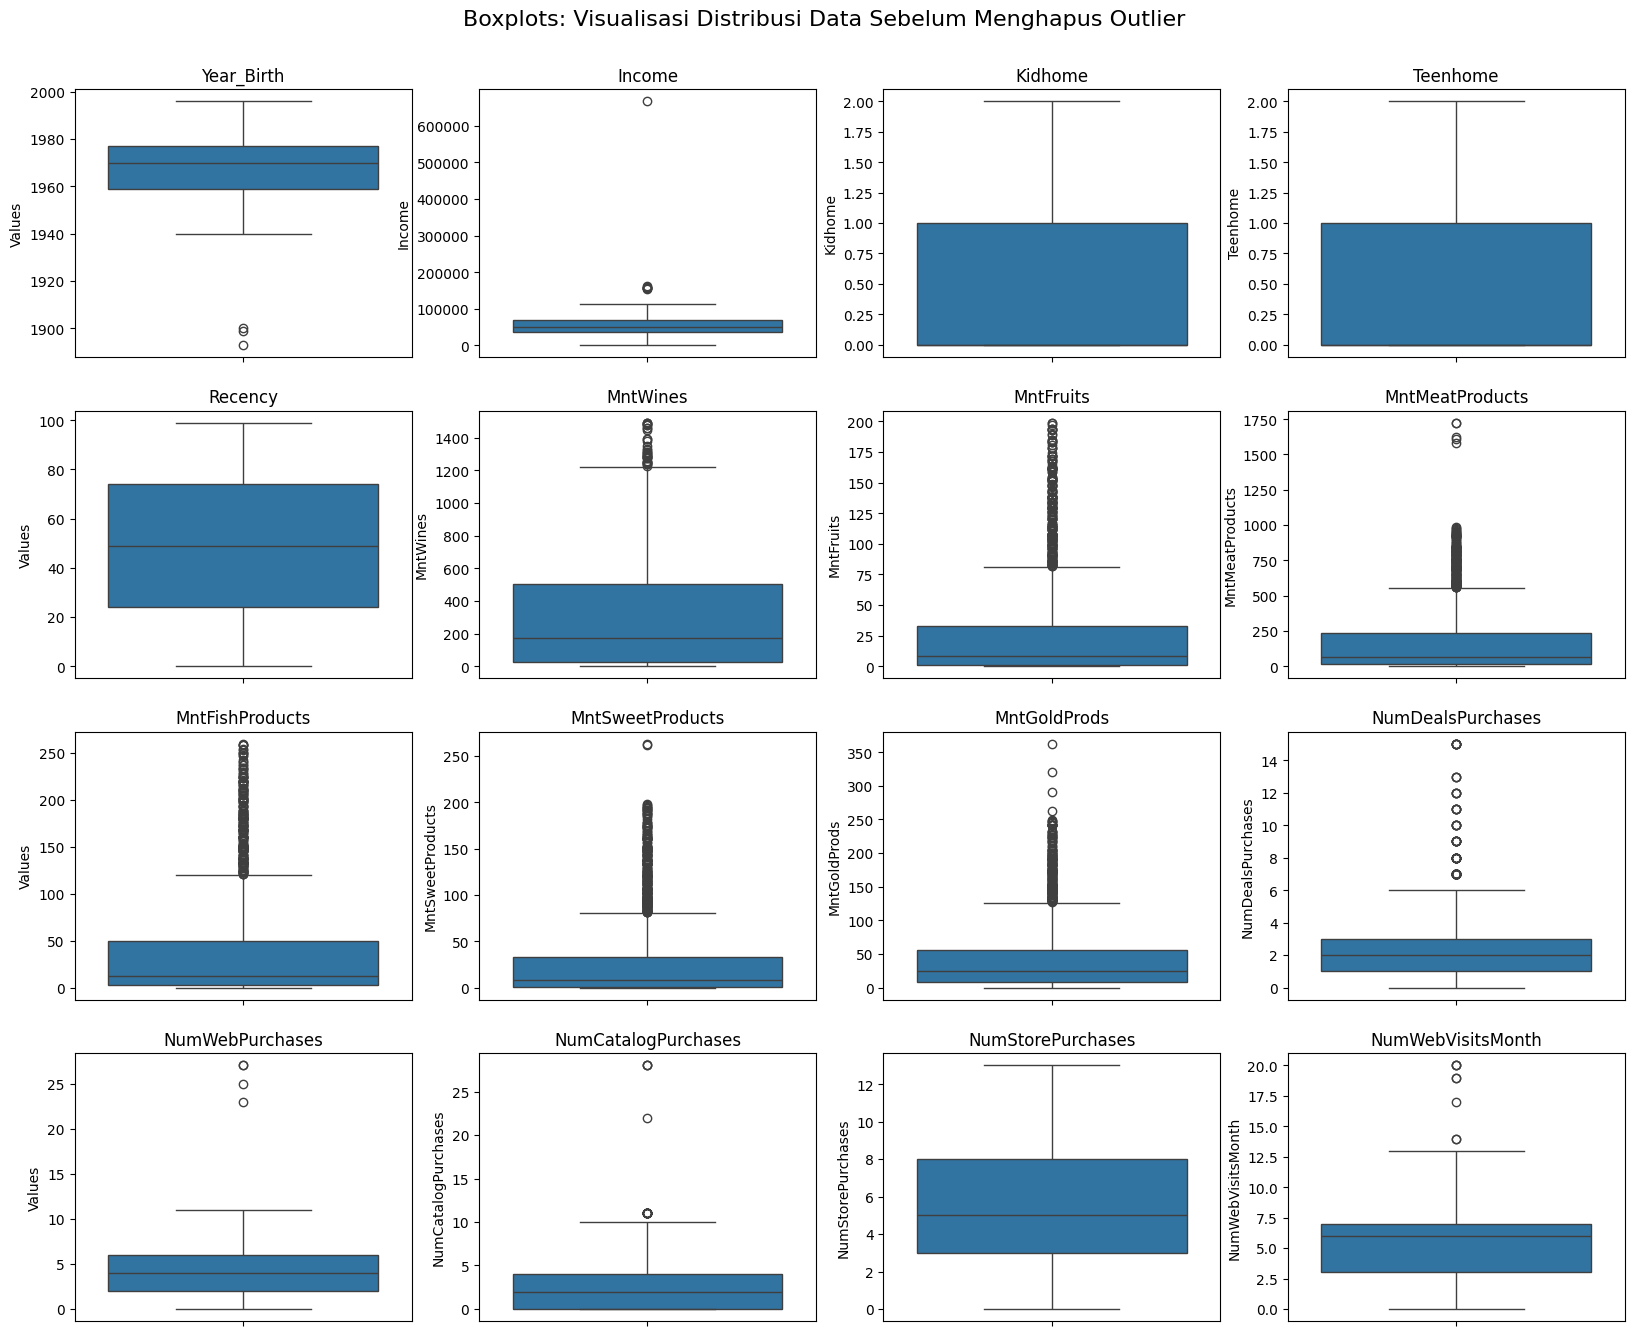

In [188]:
# Tampilkan semua kolom numerik dalam dataset.

numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=4, suptitle='Boxplots: Visualisasi Distribusi Data Sebelum Menghapus Outlier')

Secara umum, kita bisa melihat bahwa:
* Dataset supermarket_customers memiliki 28 kolom dan 2.240 baris.
* Kolom `Marital_Status` dan `Education` ada kategory yang mesti di handling atau digabung karena mempunyai arti yang sama.
* Kolom `dt_customer` berisi informasi tanggal, tetapi dapat dikonversi menjadi tipe data tanggal untuk analisis lebih lanjut, seperti menentukan durasi hubungan dengan pelanggan.
* Kolom `mntwines`, `mntfruits`, `mntmeatproducts` hingga `numwebvisitsmonth` berisi nilai numerik yang menggambarkan pengeluaran atau interaksi pelanggan dengan produk tertentu. Nilai-nilai ini akan sangat berguna dalam analisis lebih lanjut untuk segmentasi atau perilaku konsumen.
* Kolom `acceptedcmp1`, `acceptedcmp2`, `acceptedcmp3`, `acceptedcmp4`, dan `acceptedcmp5` menunjukkan apakah pelanggan menerima kampanye tertentu. Data ini bersifat biner (0 atau 1) dan sangat penting dalam analisis konversi kampanye pemasaran.
* Kolom complain menunjukkan apakah pelanggan mengajukan keluhan, yang juga merupakan informasi biner yang perlu dianalisis untuk mengetahui apakah ada hubungan antara keluhan dan pengeluaran atau respon terhadap kampanye.
* Kolom `income` menunjukkan penghasilan pelanggan, dengan nilai rata-rata sekitar 52.247. Beberapa penghasilan mungkin berada di luar rentang yang wajar (misalnya, penghasilan lebih dari 666.666), sehingga bisa jadi data ini perlu dibersihkan atau dianalisis lebih lanjut.
* Kolom `year_birth` menunjukkan tahun kelahiran pelanggan, yang dapat digunakan untuk menghitung usia mereka. Dengan data ini, kita bisa melihat apakah ada pola tertentu berdasarkan usia dalam pengeluaran atau respon terhadap kampanye.
* Kolom `response` berisi apakah pelanggan merespons kampanye pemasaran, yang merupakan target variabel yang dapat digunakan dalam analisis prediktif.
* Kolom `z_costcontact` dan `z_revenue` menggambarkan biaya dan pendapatan yang terkait dengan kontak pelanggan. Kolom-kolom ini penting untuk analisis biaya dan keuntungan dalam kampanye pemasaran.

### 1. Periksa Missing Values
* Mengisi nilai yang hilang pada kolom Income dengan median, karena median lebih robust terhadap outliers dibandingkan dengan rata-rata.
* Menghapus baris yang tidak memiliki nilai di kolom ID, karena ID biasanya adalah kolom yang penting dan unik untuk setiap baris data.

In [189]:
df['Income'].fillna(df['Income'].median(), inplace=True)  # Imputasi dengan median
df.dropna(subset=['ID'], inplace=True)  # Hapus baris tanpa ID

In [190]:
# Periksa apakah ada nilai yang hilang di kolom 'Income'
print(df['Income'].isnull().sum())  # Harusnya 0 jika imputasi berhasil

# Atau periksa keseluruhan DataFrame
print(df.isnull().sum())  # Menampilkan jumlah nilai null di setiap kolom

0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [191]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [192]:
df.tail()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### 2. Validasi dan Anomali
* Melakukan validasi pada kolom Year_Birth untuk memastikan bahwa tahun kelahiran berada dalam rentang yang wajar (antara 1900 dan 2023).
* Jika nilai Year_Birth tidak valid, nilai tersebut diubah menjadi NaN, dan kemudian baris yang memiliki nilai NaN dihapus.

In [193]:
df['Year_Birth'] = df['Year_Birth'].apply(lambda x: x if x >= 1934 and x <= 2023 else np.nan)  # Validasi
df.dropna(subset=['Year_Birth'], inplace=True)  # Hapus baris dengan nilai NaN di 'Year_Birth'


In [194]:
print(df['Year_Birth'].isnull().sum())  # Jumlah NaN di kolom 'Year_Birth'


0


In [195]:
print(df[['Year_Birth']].head())  # Menampilkan kolom 'Year_Birth' untuk pemeriksaan

   Year_Birth
0      1957.0
1      1954.0
2      1965.0
3      1984.0
4      1981.0


### 3. Format dan Konsistensi
Mengubah kolom Dt_Customer menjadi tipe data datetime, sehingga memudahkan analisis tanggal dan waktu. Penggunaan format '%d-%m-%Y' memastikan konsistensi dalam format tanggal yang diinginkan.

In [196]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')  # Ubah ke datetime

In [197]:
print(df['Dt_Customer'].dtype)  # Mengecek tipe data kolom 'Dt_Customer'

datetime64[ns]


### 4. Pemeriksaan Duplikasi
Menghapus baris duplikat berdasarkan kolom ID karena ID harus unik untuk setiap pelanggan.

In [198]:
df.drop_duplicates(subset='ID', inplace=True)  # Menghapus duplikasi berdasarkan 'ID'

In [199]:
print(df['ID'].duplicated().sum())  # Jumlah duplikasi di kolom 'ID'

0


### 5. Transformasi Kolom
1. Menambahkan kolom baru Age yang dihitung berdasarkan selisih antara tahun sekarang dan Year_Birth.
2. Menambahkan kolom Customer_Duration yang menghitung durasi pelanggan dengan mengurangi tanggal pendaftaran (Dt_Customer) dari tanggal saat ini.

In [200]:
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']  # Tambahkan kolom usia
df['Customer_Duration'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days  # Durasi sebagai pelanggan

In [201]:
print(df[['Age', 'Customer_Duration']].head())  # Menampilkan 5 baris pertama kolom 'Age' dan 'Customer_Duration'


    Age  Customer_Duration
0  67.0               4474
1  70.0               3924
2  59.0               4123
3  40.0               3950
4  43.0               3972


3. Transformasi Marital_status untuk ogether dengan Married, dan beberapa kategori seperti Alone, Absurd, dan YOLO menjadi Single.

In [202]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})
print(df['Marital_Status'].unique())

['Single' 'Married' 'Divorced' 'Widow']


4. Transformasi Education nilai 2n Cycle diganti dengan Master

In [203]:
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Master'
})
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic']


### 6. Pemeriksaan dan Penanganan Nilai Tidak Valid

In [221]:
# Cek jumlah NaN di setiap kolom
nan_count = df.isna().sum()

# Cek apakah ada NaN yang tersisa setelah perubahan
nan_check = nan_count[nan_count > 0]

# Cek baris yang mengandung NaN
nan_rows = df[df.isna().any(axis=1)]

# Cek jumlah baris dan kolom setelah penanganan NaN
shape_after_handling = df.shape

# Cek informasi DataFrame setelah penanganan NaN
info_after_handling = df.info()

# Output hasil (ini hanya jika Anda ingin melihat hasilnya)
# nan_count, nan_check, nan_rows, shape_after_handling, info_after_handling


<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   float64       
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

## Kesimpulan menunjukkan bahwa tidak ada nilai NaN di DataFrame setelah proses pembersihan data. 

Berikut adalah beberapa poin yang bisa diambil dari hasil ini:

Jumlah Baris dan Kolom:

Dataset memiliki 2.237 baris dan 36 kolom dalam DataFrame dari 2240 dan 29 kolom awal, dan semuanya sudah terisi tanpa nilai NaN. Ini berarti semua missing values sudah berhasil ditangani.

Kolom yang Diperiksa:

Setiap kolom (seperti Year_Birth, Income, Marital_Status, dll.) memiliki nilai Non-Null Count yang setara dengan jumlah baris (2.237). Ini menunjukkan bahwa tidak ada kolom yang mengandung nilai kosong (NaN), yang berarti proses imputasi dan penghapusan nilai NaN berjalan dengan baik.

Data Tipe (Dtype):

Semua kolom memiliki tipe data yang sesuai, misalnya, int64, float64, dan datetime64. Hal ini juga menunjukkan bahwa tidak ada kesalahan dalam penanganan data tipe.
Tidak Ada NaN yang Tertinggal:

Dengan adanya hasil Non-Null Count yang setara dengan jumlah total baris di setiap kolom, bisa disimpulkan bahwa semua nilai NaN telah berhasil dihapus atau diisi sesuai dengan metode yang digunakan (misalnya, imputasi dengan median atau penghapusan baris yang tidak memiliki ID).
Secara keseluruhan, DataFrame sudah bersih dari nilai NaN dan siap untuk langkah analisis

### 7. Persiapan Analisa Data

#### Membuat Kolom Income_Group dan Age_Group 

In [205]:
# Membuat kolom 'Income_Group'
bins_income = [0, 20000, 50000, float('inf')]
labels_income = ['Low', 'Medium', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=bins_income, labels=labels_income)

# Membuat kolom 'Age_Group'
bins_age = [0, 30, 50, float('inf')]
labels_age = ['Young', 'Middle', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Cek hasilnya
print(df[['Income', 'Income_Group', 'Age', 'Age_Group']].head())


    Income Income_Group   Age Age_Group
0  58138.0         High  67.0    Senior
1  46344.0       Medium  70.0    Senior
2  71613.0         High  59.0    Senior
3  26646.0       Medium  40.0    Middle
4  58293.0         High  43.0    Middle


## Menyimpan dataset yang sudah bersih

In [206]:
# Menyimpan dataset yang sudah dibersihkan ke file CSV
df.to_csv('dataset_cleaned.csv', index=False)

In [207]:
# Menyimpan dataset yang sudah dibersihkan ke file Excel
df.to_excel('dataset_cleaned.xlsx', index=False)

# Data Analysis

Kita adalah memberikan insight kepada pelanggan supermarket menggunakan data yang sudah bersih, kita bisa mengikuti beberapa langkah untuk melakukan analisis, visualisasi, dan menarik kesimpulan yang relevan.

## 1. Analisis Deskriptif
Tujuan: Memahami distribusi data secara keseluruhan dan menggali pola dasar.

Tindakan: Kita akan menghitung statistik dasar seperti rata-rata, median, nilai maksimum/minimum untuk variabel seperti Income, Age, dan Customer_Duration, serta distribusi kategori seperti Marital_Status dan Education.

In [208]:
# Statistik Deskriptif untuk variabel numerik
summary_stats = df.describe()

# Statistik untuk kategori seperti Marital_Status dan Education
category_stats = df[['Marital_Status', 'Education']].value_counts()

# Cek distribusi Age
age_distribution = df['Age'].describe()

# Cek distribusi Income
income_distribution = df['Income'].describe()

# Cek distribusi Customer_Duration
duration_distribution = df['Customer_Duration'].describe()


## 2. Visualisasi Data
Visualisasi adalah cara untuk memberikan gambaran yang jelas kepada pelanggan supermarket tentang tren dan pola yang ada. Beberapa visualisasi yang dapat dibuat:

a. Distribusi Umur: Agar pelanggan supermarket memahami sebaran usia pelanggan.
b. Distribusi Penghasilan: Untuk mengetahui bagaimana penghasilan pelanggan tersebar.
c. Durasi Keanggotaan: Untuk menunjukkan berapa lama pelanggan telah terdaftar di supermarket.
d. Penyebaran Status Pernikahan dan Pendidikan: Untuk melihat bagaimana pelanggan terdistribusi dalam kategori ini.

### a. Distribusi Umur

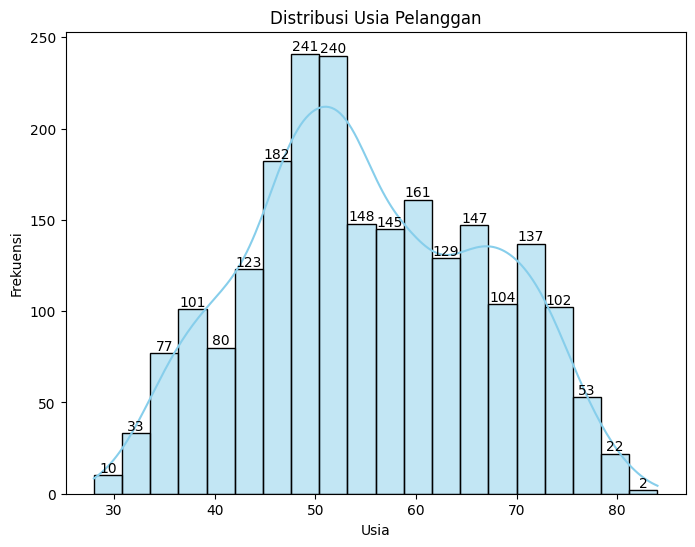

In [209]:
# Visualisasi distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', stat="count")
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang histogram
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan angka jika tinggi batang > 0
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')
plt.show()

### b. Distribusi Penghasilan

 Dari grafik diatas sebagian besar pelanggan berusia antara 45 hingga 55 tahun, supermarket dapat merancang promosi yang lebih spesifik untuk usia tersebut.

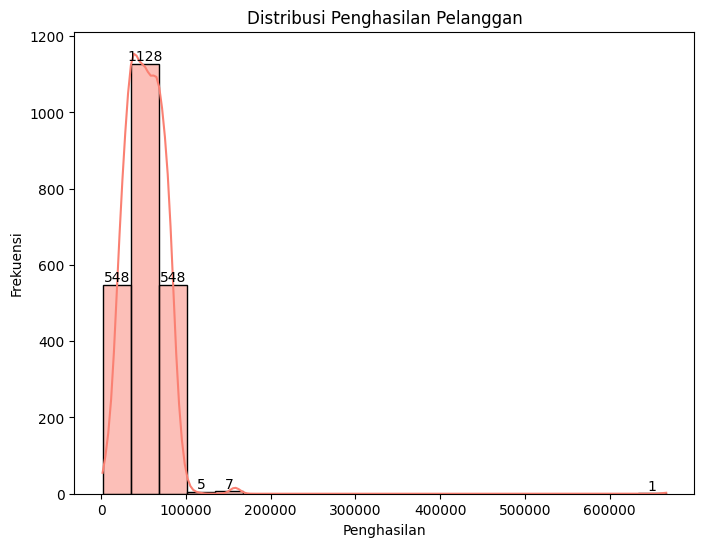

In [210]:
# Visualisasi distribusi penghasilan
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='salmon', stat="count")
plt.title('Distribusi Penghasilan Pelanggan')
plt.xlabel('Penghasilan')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang histogram
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan angka jika tinggi batang > 0
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')
plt.show()

Direntang penghasilan 25K-75K yang terlihat lebih banyak, supermarket bisa menyesuaikan penawaran produk atau harga agar lebih relevan dengan penghasilan pelanggan.

### c. Durasi Keanggotaan

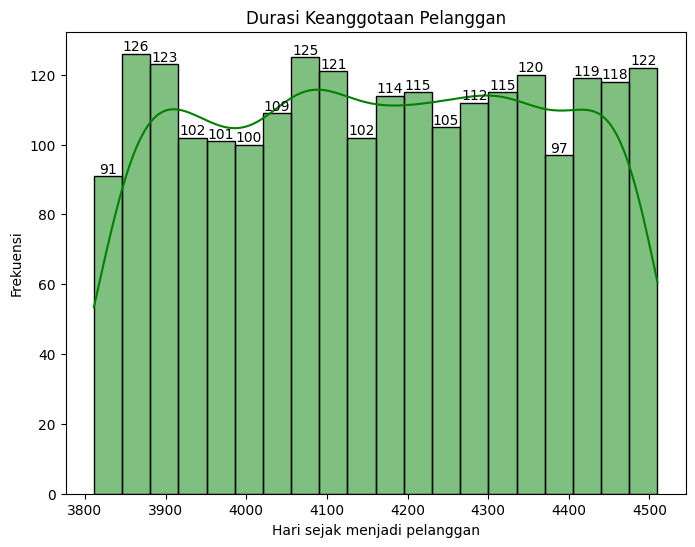

In [211]:
# Visualisasi durasi keanggotaan
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Duration'], bins=20, kde=True, color='green', stat="count")
plt.title('Durasi Keanggotaan Pelanggan')
plt.xlabel('Hari sejak menjadi pelanggan')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang histogram
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan angka jika tinggi batang > 0
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')
plt.show()

Pelanggan yang lebih lama terdaftar diatas 4400 hari lebih loyal. Supermarket dapat membuat program loyalitas khusus atau memberikan diskon khusus untuk pelanggan yang telah lebih lama berbelanja

### d. Penyebaran Status Pernikahan

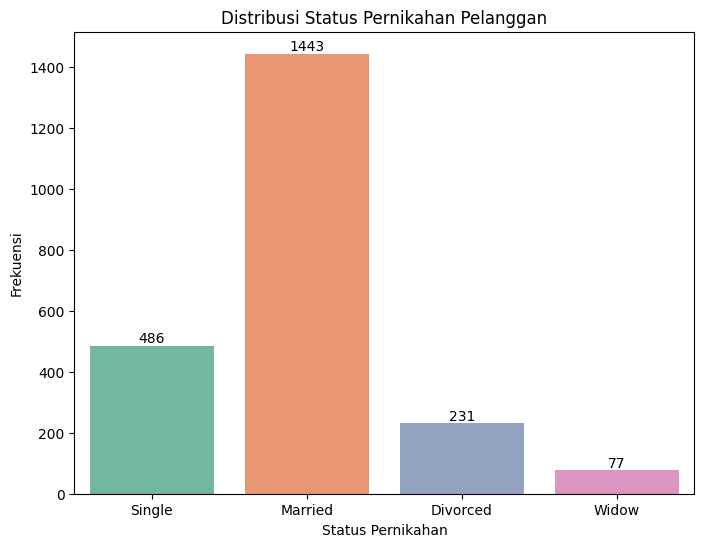

In [212]:
# Visualisasi distribusi Marital_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Distribusi Status Pernikahan Pelanggan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang countplot
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')
plt.show()

Untuk segmen yang dominan dalam status pernikahan (lebih banyak pelanggan yang sudah menikah) sebanyak 1443, supermarket bisa mempertimbangkan jenis produk atau penawaran yang lebih relevan, seperti promosi untuk keluarga atau pasangan.

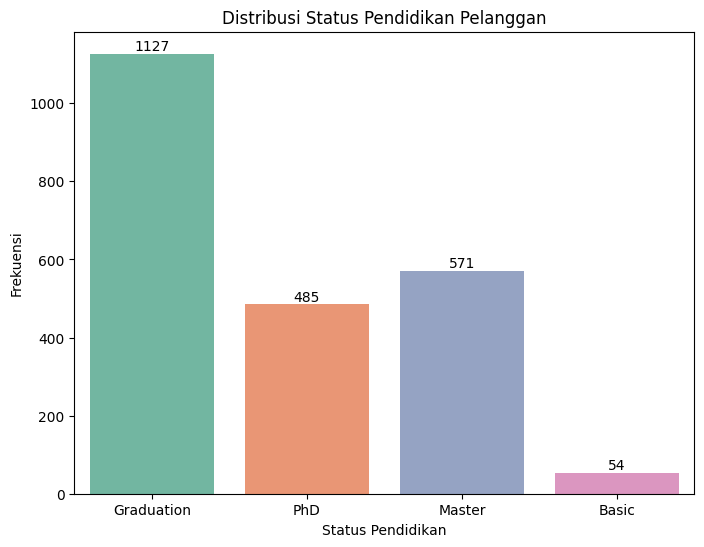

In [213]:
# Visualisasi distribusi Marital_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette='Set2')
plt.title('Distribusi Status Pendidikan Pelanggan')
plt.xlabel('Status Pendidikan')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang countplot
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')
plt.show()

Untuk satatus pendidikan graduation lebih banyak dikarenakan faktor pendapatan yang lebih stabil dan waktu yang lebih banyak.

## 3. Segmen dan Kategorisasi Pelanggan

### Segmentasi Berdasarkan Usia

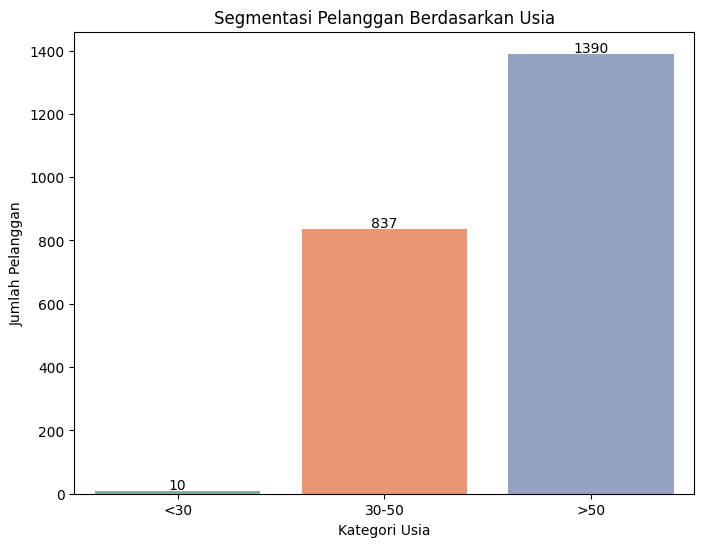

In [214]:
# Membuat kategori usia
bins = [0, 30, 50, 100]
labels = ['<30', '30-50', '>50']
df['Age_Segment'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(8, 6))
age_counts = df['Age_Segment'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Set2')
plt.title('Segmentasi Pelanggan Berdasarkan Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan angka di atas bar
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)
plt.show()



Pelanggan di range umur dirange 50 tahun lebih stabil kunjungan ke supermarket karena untuk kebutuhan harian/bulanan sudah teratur.

### Segmentasi Berdasarkan Penghasilan

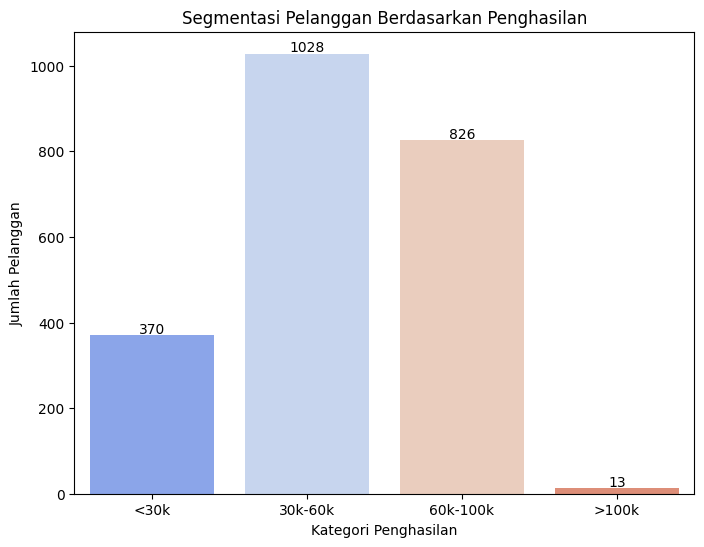

In [215]:
# Membuat kategori penghasilan
bins = [0, 30000, 60000, 100000, df['Income'].max()]
labels = ['<30k', '30k-60k', '60k-100k', '>100k']
df['Income_Segment'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(8, 6))
income_counts = df['Income_Segment'].value_counts().sort_index()
sns.barplot(x=income_counts.index, y=income_counts.values, palette='coolwarm')
plt.title('Segmentasi Pelanggan Berdasarkan Penghasilan')
plt.xlabel('Kategori Penghasilan')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan angka di atas bar
for i, v in enumerate(income_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)
plt.show()


Pelanggan dengan penghasilan di 30k-60k menjaadi pelanggan terbanyak karena berada di kelas menengah sehingga untuk kebutuhan dan waktu yang banyak untuk berbelanja di supermarket

### Segmentasi Berdasarkan Loyalitas Pelanggan

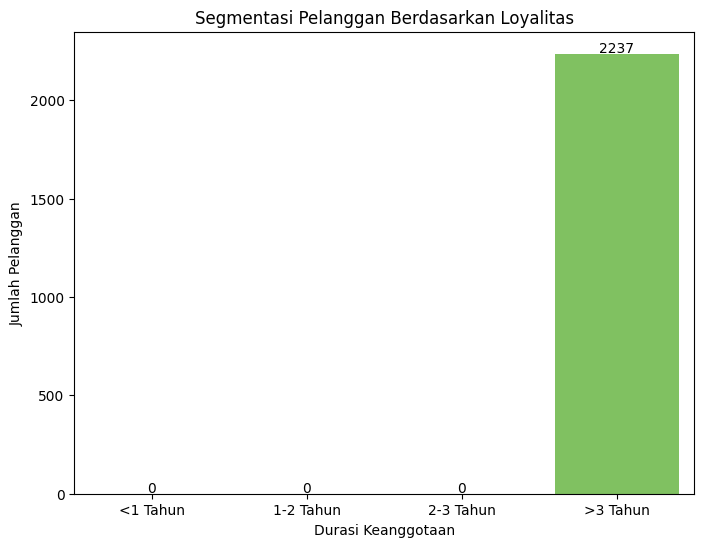

In [216]:
# Membuat kategori durasi keanggotaan
bins = [0, 365, 730, 1095, df['Customer_Duration'].max()]
labels = ['<1 Tahun', '1-2 Tahun', '2-3 Tahun', '>3 Tahun']
df['Loyalty_Segment'] = pd.cut(df['Customer_Duration'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(8, 6))
loyalty_counts = df['Loyalty_Segment'].value_counts().sort_index()
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='viridis')
plt.title('Segmentasi Pelanggan Berdasarkan Loyalitas')
plt.xlabel('Durasi Keanggotaan')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan angka di atas bar
for i, v in enumerate(loyalty_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)
plt.show()


Untuk tingkat loyalitas, pelanggan diatas 3 tahun adalah yang terloyal

# 4. Analisa Utama

## 1. Menganalisis Kinerja Produk dan Layanan

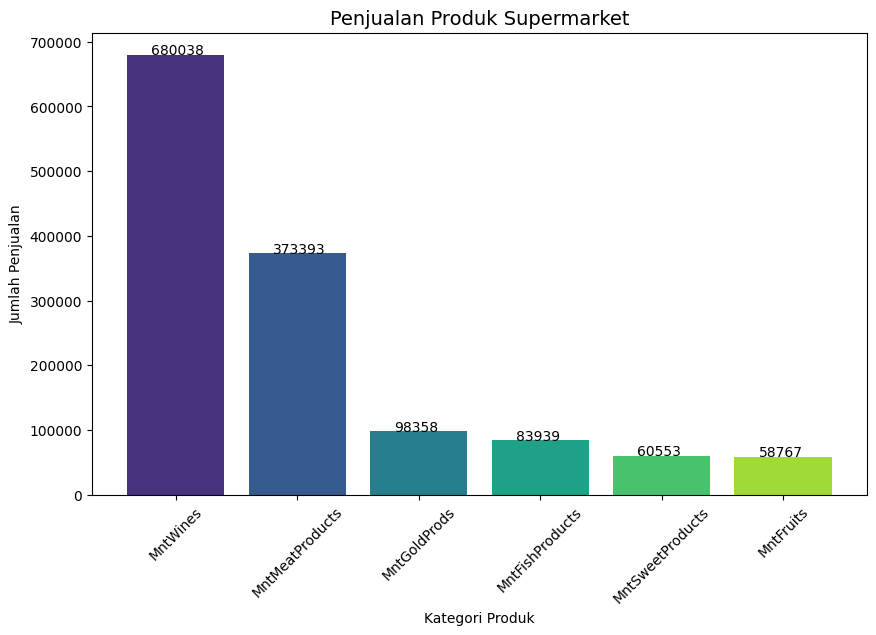

In [217]:
# Dataset Mnt_Products
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_sales = df[products].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(product_sales))
bars = plt.bar(product_sales.index, product_sales.values, color=colors)

# Tambahkan angka di tiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 50, f"{int(bar.get_height())}", fontsize=10)

plt.title("Penjualan Produk Supermarket", fontsize=14)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Penjualan")
plt.xticks(rotation=45)
plt.show()



Dari analisis produk, kategori "Wines" menunjukkan tingkat penjualan tertinggi, sementara "SweetProducts" berada pada posisi terendah. Hal ini menunjukkan bahwa pelanggan cenderung lebih memilih produk dengan nilai premium atau yang mendukung gaya hidup mereka.


## 2. Memeriksa Segmentasi Pelanggan Berdasarkan Pembelian Produk

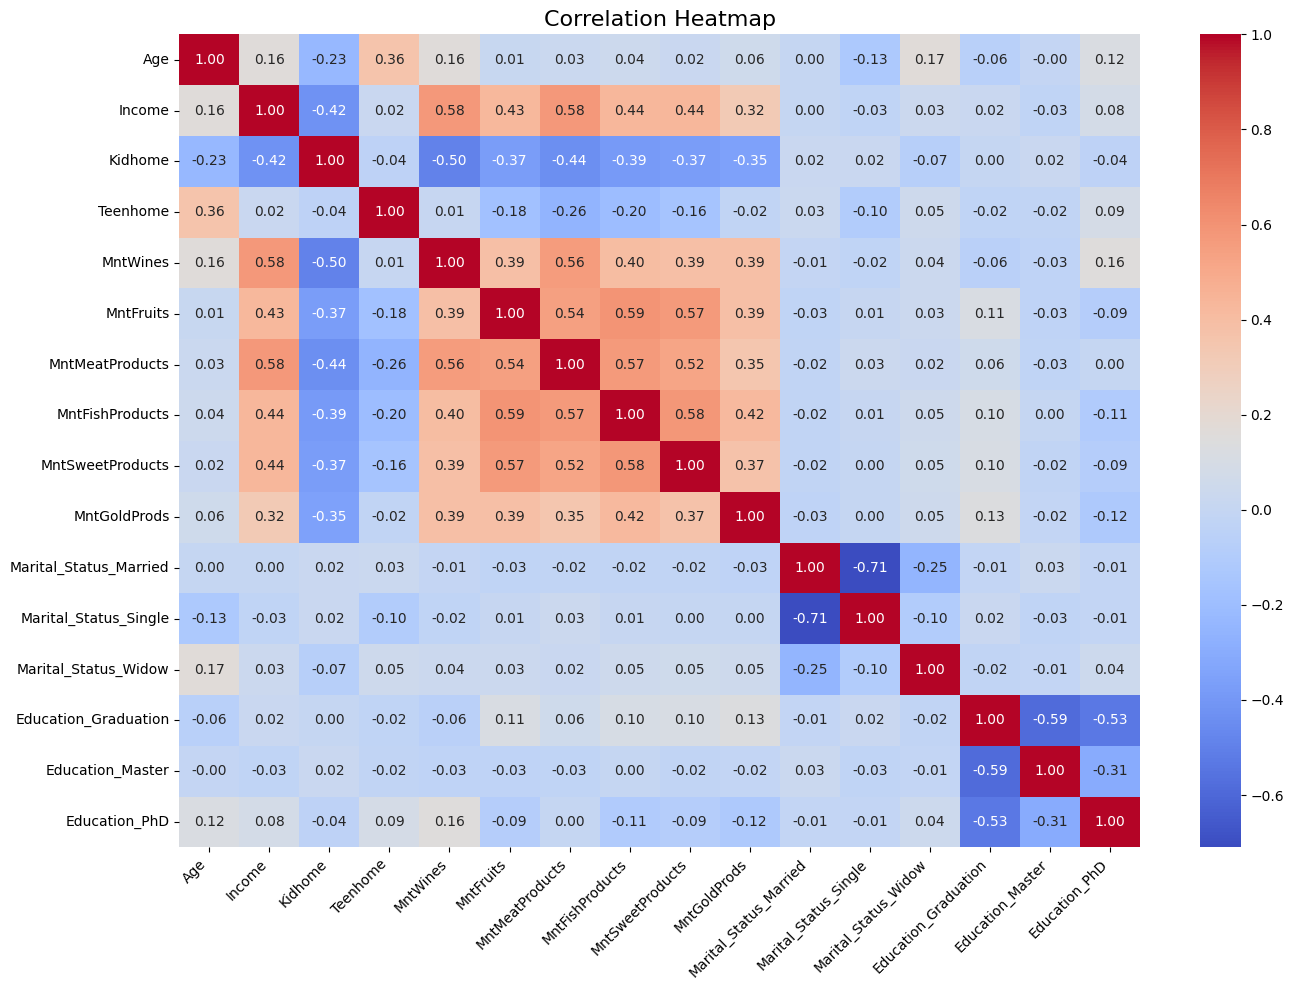

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengonversi kolom kategori menjadi data numerik
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Education'], drop_first=True)

# Pilih kolom yang akan dihitung korelasinya
segment_cols = ['Age', 'Income', 'Kidhome', 'Teenhome']
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menggabungkan kolom numerik dengan kategori yang sudah di-encode
all_columns = segment_cols + products + list(df_encoded.filter(like='Marital_Status_')) + list(df_encoded.filter(like='Education_'))

# Menghitung korelasi
correlations = df_encoded[all_columns].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Analisis korelasi menunjukkan bahwa variabel seperti pendapatan dan status pendidikan memiliki pengaruh signifikan terhadap pengeluaran pelanggan. Pelanggan dengan pendidikan tinggi dan pendapatan yang lebih besar, cenderung menghabiskan lebih banyak untuk produk seperti Wines dan MeatProducts.

## 3. Menilai Efektivitas Kampanye Supermarket terhadap Penjualan

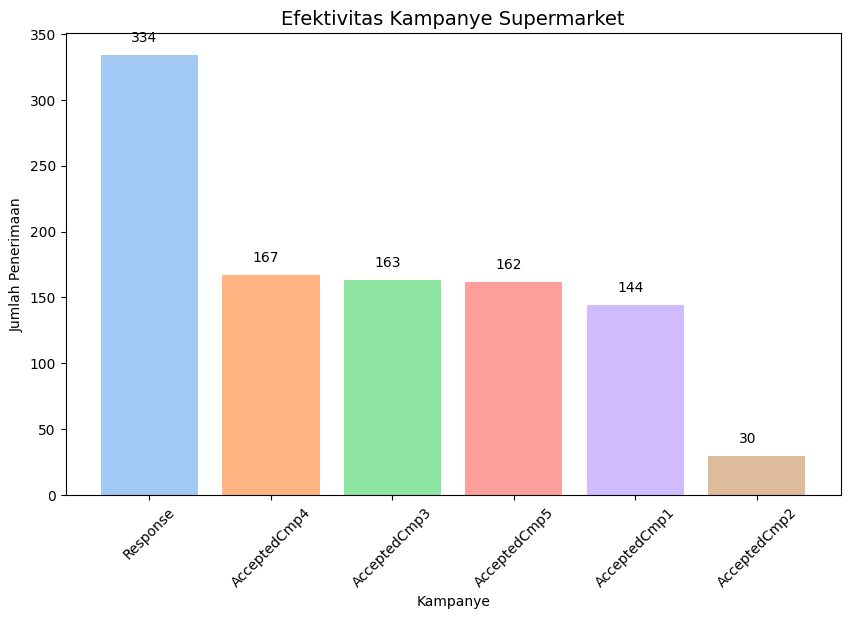

In [219]:
# Total Kampanye Diterima (Hanya Kolom Kampanye)
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_effect = df[campaign_cols].sum().sort_values(ascending=False)

# Palet warna
colors = sns.color_palette("pastel", len(campaign_effect))

# Visualisasi Kampanye
plt.figure(figsize=(10, 6))
bars = plt.bar(campaign_effect.index, campaign_effect.values, color=colors)

# Tambahkan angka di tiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.15, bar.get_height() + 10, f"{int(bar.get_height())}", fontsize=10)

plt.title("Efektivitas Kampanye Supermarket", fontsize=14)
plt.xlabel("Kampanye")
plt.ylabel("Jumlah Penerimaan")
plt.xticks(rotation=45)
plt.show()


Dari analisis kampanye, terlihat bahwa beberapa kampanye memiliki tingkat keberhasilan yang lebih tinggi dibandingkan yang lain. Kampanye Cmp4 dan Response, misalnya, memberikan dampak positif terhadap penjualan produk. Namun, beberapa kampanye lain menunjukkan hasil yang kurang efektif.

## 4. Menentukan Lokasi Optimal untuk Penjualan Produk

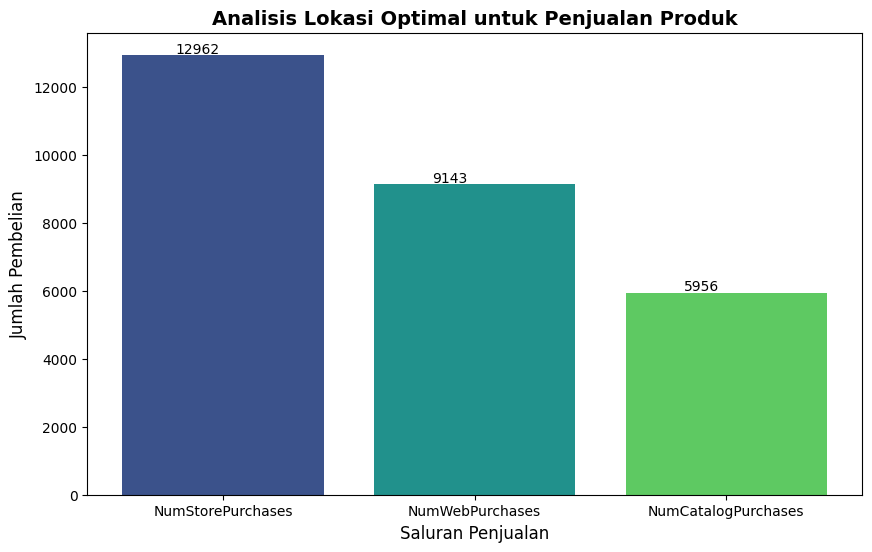

In [220]:
# Total pembelian untuk setiap saluran
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_totals = df[purchase_channels].sum().sort_values(ascending=False)

# Membuat warna yang menarik
colors = sns.color_palette("viridis", len(channel_totals))

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_totals.index, channel_totals.values, color=colors)

# Menambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 50, 
             f"{int(bar.get_height())}", ha='center', fontsize=10)

# Memberikan judul dan label
plt.title("Analisis Lokasi Optimal untuk Penjualan Produk", fontsize=14, fontweight='bold')
plt.xlabel("Saluran Penjualan", fontsize=12)
plt.ylabel("Jumlah Pembelian", fontsize=12)
plt.xticks(rotation=0)
plt.show()



Saluran ini menunjukkan jumlah pembelian yang dilakukan secara langsung di toko fisik. Data menunjukkan bahwa pembelian melalui toko fisik adalah yang terbanyak dibandingkan dengan kedua saluran lainnya.

* Dominasi Toko Fisik: Saluran ini memiliki pengaruh signifikan karena pelanggan masih merasa lebih nyaman untuk melihat, menyentuh, dan mencoba produk secara langsung. Banyak pelanggan juga cenderung berbelanja impulsif saat berada di toko.
* Pengalaman Belanja Langsung: Faktor kenyamanan dan kesempatan untuk berinteraksi dengan produk membuat toko fisik tetap menjadi pilihan utama. Selain itu, elemen-elemen seperti lokasi strategis dan promosi di dalam toko dapat menarik lebih banyak pelanggan.


# Kesimpulan dan Rekomendasi:

## Kesimpulan
Dari analisis kinerja produk dan layanan, dapat disimpulkan bahwa beberapa produk menunjukkan tingkat penjualan yang lebih tinggi, sementara yang lain lebih rendah. Produk dengan penjualan tinggi menunjukkan permintaan yang lebih stabil dan mungkin memiliki posisi yang lebih kuat di pasar. Sebaliknya, produk dengan penjualan rendah mungkin memerlukan perhatian lebih dalam hal pemasarannya atau penyesuaian harga dan promosi untuk meningkatkan daya tariknya.
Segmentasi Pelanggan Berdasarkan Pembelian Produk:

Segmentasi pelanggan berdasarkan usia, status pernikahan, pendidikan, dan faktor lainnya membantu untuk memahami pola pembelian dan preferensi pelanggan. Pelanggan dari segmen usia tertentu, misalnya, lebih cenderung membeli produk tertentu, sementara status pernikahan dan pendidikan juga mempengaruhi jenis produk yang dibeli. Pendapatan menjadi faktor penting yang berhubungan dengan pengeluaran, dengan pelanggan berpendapatan lebih tinggi cenderung membeli produk lebih mahal atau lebih banyak.
Efektivitas Kampanye Supermarket terhadap Penjualan:

Kampanye pemasaran supermarket memiliki dampak signifikan terhadap tingkat penjualan, dengan jumlah kampanye yang diterima pelanggan berhubungan langsung dengan peningkatan penjualan. Efektivitas kampanye lebih tinggi ketika disesuaikan dengan segmentasi pelanggan yang tepat dan produk yang lebih relevan dengan audiens target. Semakin banyak kampanye yang diterima oleh pelanggan, semakin tinggi pula kontribusinya terhadap penjualan.
Lokasi Optimal untuk Penjualan Produk:

Lokasi toko dan saluran penjualan memainkan peran penting dalam tingkat penjualan produk. Beberapa lokasi menunjukkan pembelian produk yang lebih tinggi, menunjukkan bahwa penempatan produk di lokasi yang strategis bisa berdampak besar pada performa penjualan. Analisis menunjukkan bahwa produk tertentu lebih sering dibeli di lokasi-lokasi tertentu, yang menunjukkan perlunya strategi distribusi produk yang lebih terfokus berdasarkan lokasi.


## Rekomendasi:
Untuk kategori produk laris seperti Wines, supermarket dapat memperluas jangkauan dengan menambahkan variasi produk baru atau mengadakan promosi spesial, seperti buy one get one free. Sementara itu, produk yang kurang diminati seperti SweetProducts dapat didukung dengan inovasi, seperti menawarkan produk baru, menciptakan kemasan menarik, atau memberikan diskon besar-besaran untuk meningkatkan daya tariknya.

Supermarket dapat menerapkan strategi personalisasi promosi berdasarkan demografi. Contohnya, untuk pelanggan dengan pendapatan tinggi, supermarket dapat menawarkan layanan premium, seperti langganan keanggotaan eksklusif atau diskon khusus pada produk premium. Sementara itu, pelanggan dengan pendapatan menengah ke bawah dapat dijangkau melalui program bundling hemat atau cashback.

Strategi kampanye harus dievaluasi dan difokuskan pada metode yang terbukti berhasil. Supermarket perlu melakukan analisis mendalam pada pelanggan yang merespons kampanye, memahami preferensi mereka, dan menyesuaikan pesan kampanye agar lebih relevan. Selain itu, eksperimen dengan saluran distribusi kampanye, seperti media sosial atau email, dapat dilakukan untuk memperluas jangkauan.

Optimalkan pengalaman di toko fisik dengan mendominasi pembelian di toko, penting untuk terus berinovasi dalam pengalaman pelanggan di dalam toko. Misalnya, penataan toko yang lebih menarik, penawaran diskon spesial, atau pemasaran visual yang menarik untuk mendorong lebih banyak kunjungan.
Meningkatkan kenyamanan pelanggan dan memastikan pengalaman pelanggan di toko fisik menjadi mudah dan menyenankan dengan menyediakan berbagai fasilitas seperti parkir yang cukup, pencarian produk yang cepat, dan transaksi yang efisien.

Dengan mengikuti rekomendasi ini, supermarket dapat meningkatkan performa penjualannya, memaksimalkan efisiensi kampanye, dan memberikan pengalaman yang lebih baik bagi pelanggan.